In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import random
import matplotlib.pyplot as plt
import seaborn as sns
from src.dataprep.make_splits_cnc import extract_data_csv

%load_ext autoreload
%autoreload 2

In [7]:
df, unixtime = extract_data_csv('auto$004.csv')

In [8]:
df.head()

,current_main,current_sub,speed_main,speed_sub,cut_signal,tool_no
0,2,9,0,0,0,8
1,2,5,0,0,0,8
2,2,1,0,0,0,8
3,1,1,0,0,0,8
4,2,3,0,0,0,8


In [9]:
# get dtype of each column
df.dtypes

current_main    int16
current_sub     int16
speed_main      int16
speed_sub       int16
cut_signal      int16
tool_no         int16
dtype: object

In [10]:
# save only tool 54
df = df[df['tool_no'] == 54][["current_sub", "cut_signal"]].reset_index(drop=True)
df.head()

,current_sub,cut_signal
0,1,0
1,2,0
2,1,0
3,1,0
4,1,0


In [12]:
df.to_csv('tool54_example.csv', index=False)

In [11]:
plt.plot(df[df["tool_no"]==54][["current_sub", "cut_signal"]])

KeyError: 'tool_no'

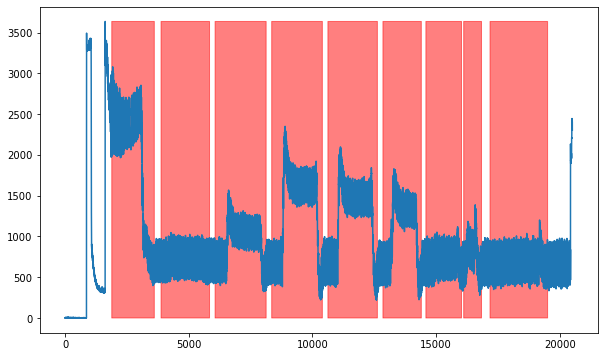

In [28]:
s = df[df["tool_no"]==54]["current_sub"].values
s2 = df[df["tool_no"]==54]["cut_signal"].values

fig, ax = plt.subplots(
    1,
    1,
    figsize=(10, 6),
)

ax.plot(s)
# ax2 = ax.twinx()

# ax2.plot(s2, color="red")
ax.fill_between(range(len(s)), min(s), max(s), where=(s2>0), color="red", alpha=0.5)



In [22]:
s2.shape

(20504, 1)